In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

startup = pd.read_csv('employee_promotion_dataset.csv')


In [2]:
startup.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [4]:
startup.shape

(54808, 13)

In [5]:
startup.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [6]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [8]:
startup.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.712238,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.521910,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


**DATA PREPROCESSING**

In [9]:
df = startup.copy()

In [10]:
(df.isna().sum()/len(df))*100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
awards_won              0.000000
avg_training_score      4.670851
is_promoted             0.000000
dtype: float64

Filling missing values of continuous variables with the median

In [11]:
df.age.fillna(df['age'].median(), inplace=True)
df.previous_year_rating.fillna(df['previous_year_rating'].median(), inplace=True)
df.avg_training_score.fillna(df['avg_training_score'].median(), inplace=True)

Filling missing values of categorical variables with the value which appears the maximum number of times in the column 

In [12]:
df.education.fillna("Bachelor's", inplace=True)

Dropping employee_Id because each value is unique and it does not help in analysis

In [13]:
df.drop('employee_id',axis=1, inplace=True)

Transforming gender into 0 and 1s (binary number)

In [14]:
df['gender'] = df['gender'].map({'f':0, 'm':1}).astype(int)

**Spliting continous and categorical data**

In [15]:
df_cont = df.select_dtypes(include=['int64','float64'])
df_cate = df.select_dtypes(exclude=['int64','float64'])

**EXPLORATORY DATA ANALYSIS**

Univariate analysis

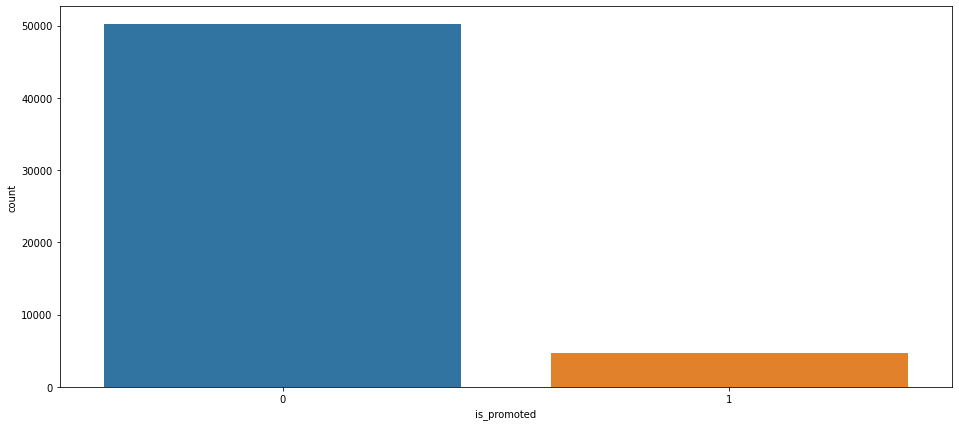

In [17]:
plt.figure(figsize=(16,7))
sns.countplot(x='is_promoted', data=df)

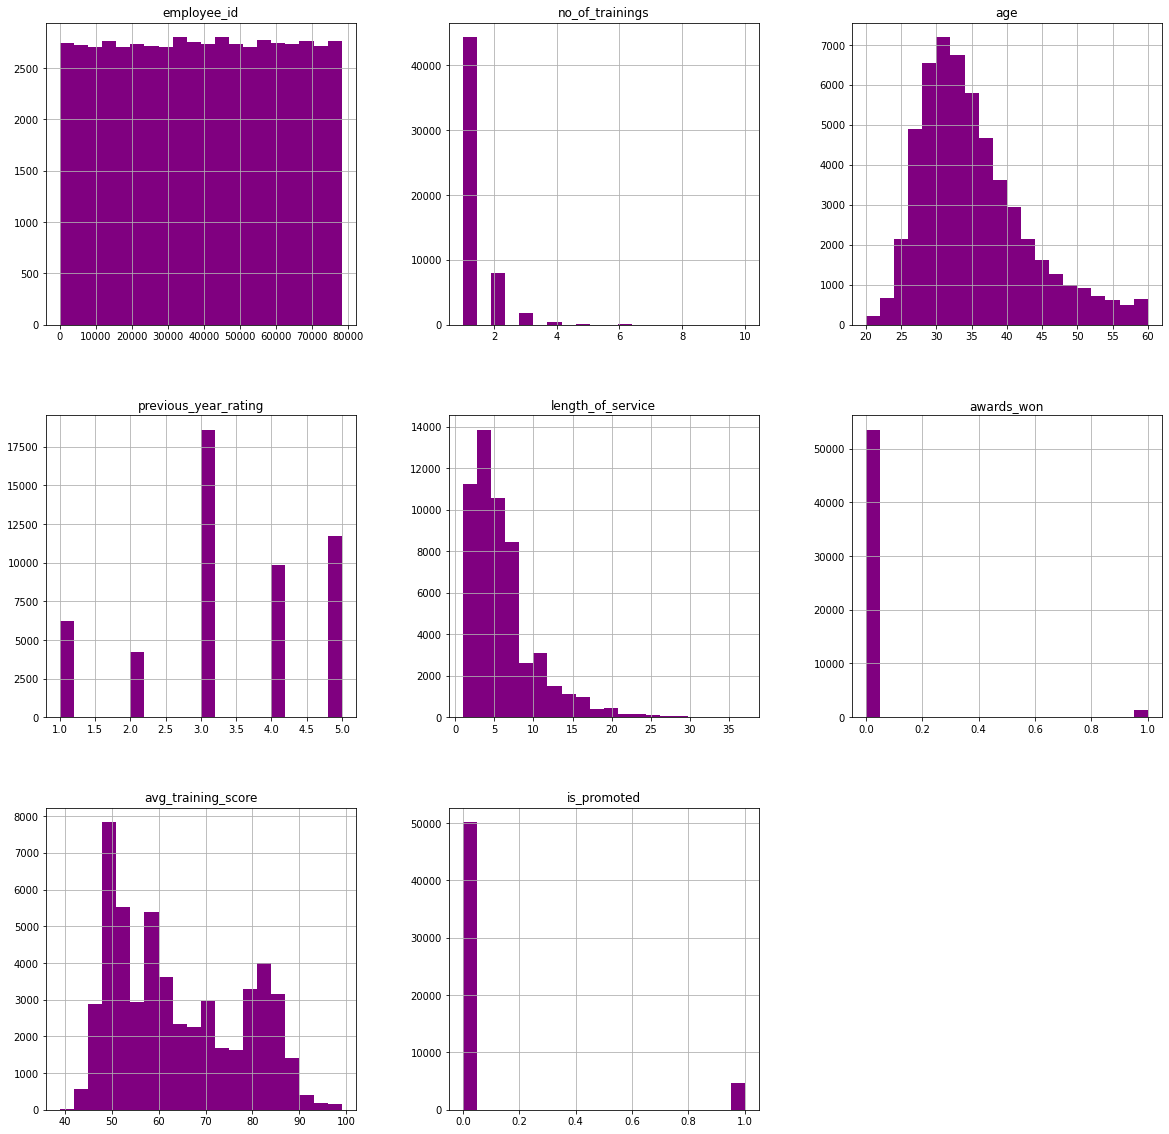

In [19]:
startup.hist(figsize=(20,20),bins = 20, color="purple")
plt.title("Numeric Features Distribution")
plt.show()

Department distribution

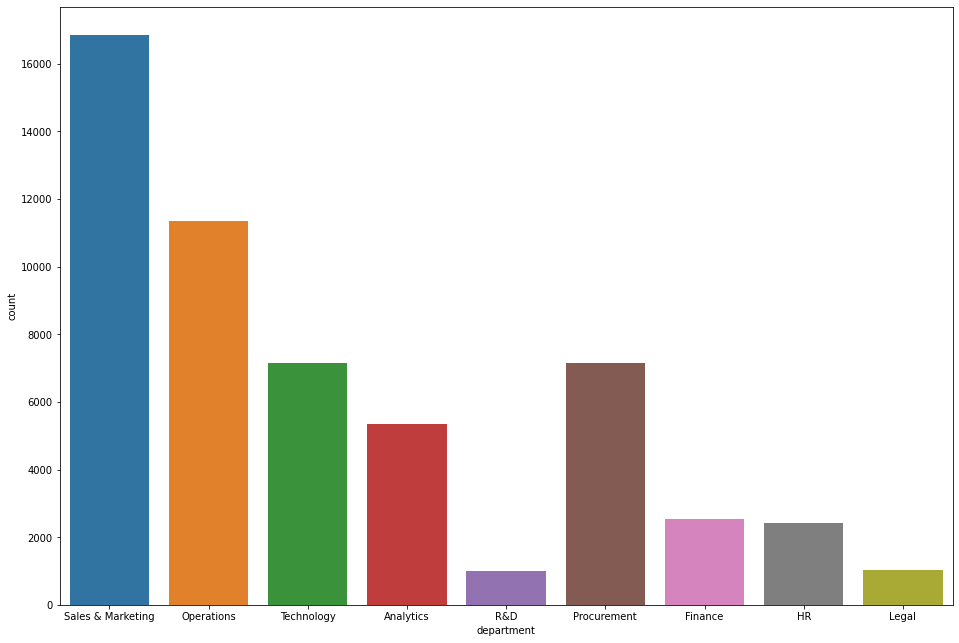

In [22]:
plt.figure(figsize=(16,11))
sns.countplot(data = startup, x = "department")
plt.show()

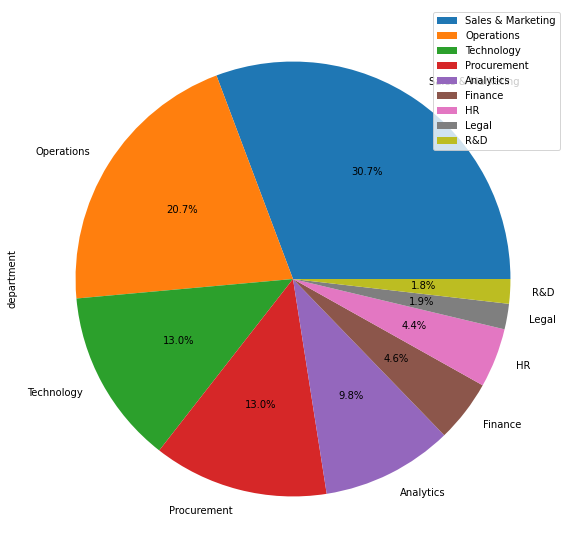

In [24]:
startup["department"].value_counts().head(10).plot(kind = 'pie',autopct='%1.1f%%',figsize=(10,10)).legend()

Regional distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text major ticklabel objects>)

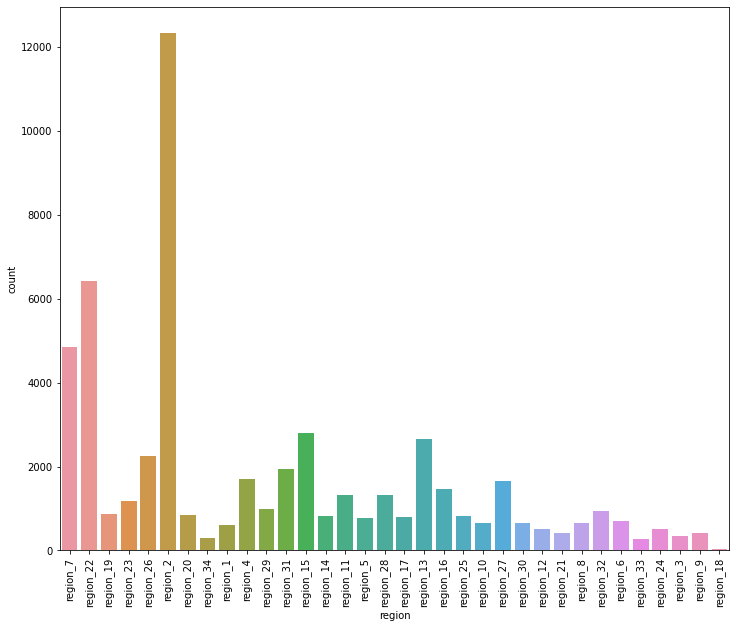

In [25]:
plt.figure(figsize=(12,10))
sns.countplot(startup.region)
plt.xticks(rotation=90)

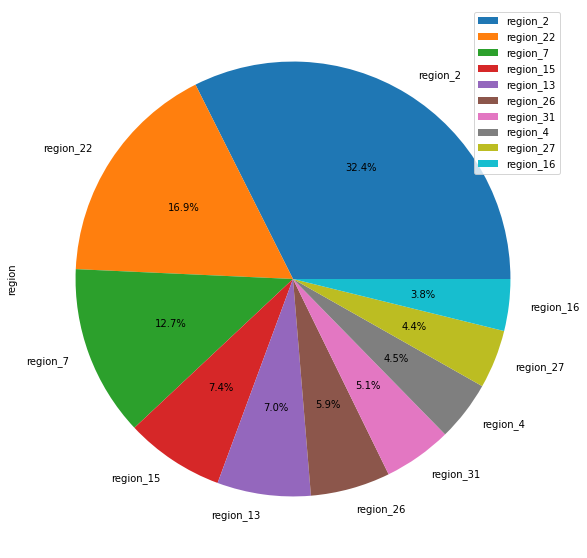

In [26]:
startup["region"].value_counts().head(10).plot(kind = 'pie',autopct='%1.1f%%',figsize=(10,10)).legend()

Gender distribution

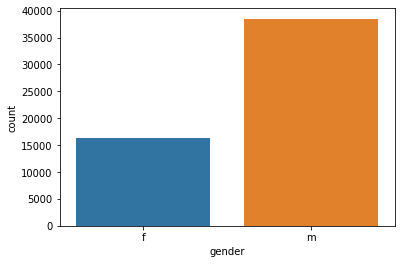

In [27]:
sns.countplot(data = startup, x="gender")
plt.show()

**DESCRIPTIVE STATISTICS**

In [28]:
ct = pd.DataFrame(df_cont.apply( np.mean )).T
ct1 = pd.DataFrame(df_cont.apply( np.median )).T
d1 = pd.DataFrame(df_cont.apply( np.std )).T
d2 = pd.DataFrame(df_cont.apply( min )).T
d3 = pd.DataFrame(df_cont.apply( max )).T
d4 = pd.DataFrame(df_cont.apply( lambda x: x.max() - x.min() )).T
d5 = pd.DataFrame(df_cont.apply( lambda x: x.skew() )).T

m = pd.concat( [d2,d3,d4,ct,ct1,d1,d5] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std','skew']
m

,attributes,min,max,range,mean,median,std,skew
0,gender,0.0,1.0,1.0,0.702379,1.0,0.457212,-0.885300
1,no_of_trainings,1.0,10.0,9.0,1.253011,1.0,0.609258,3.445434
2,age,20.0,60.0,40.0,34.803915,33.0,7.660099,1.007432
3,previous_year_rating,1.0,5.0,4.0,3.304481,3.0,1.214759,-0.260858
4,length_of_service,1.0,37.0,36.0,5.865512,5.0,4.265055,1.738061
5,awards_won,0.0,1.0,1.0,0.023172,0.0,0.150449,6.338914
6,avg_training_score,39.0,99.0,60.0,63.538845,60.0,13.225432,0.465344
7,is_promoted,0.0,1.0,1.0,0.085170,0.0,0.279135,2.972339


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

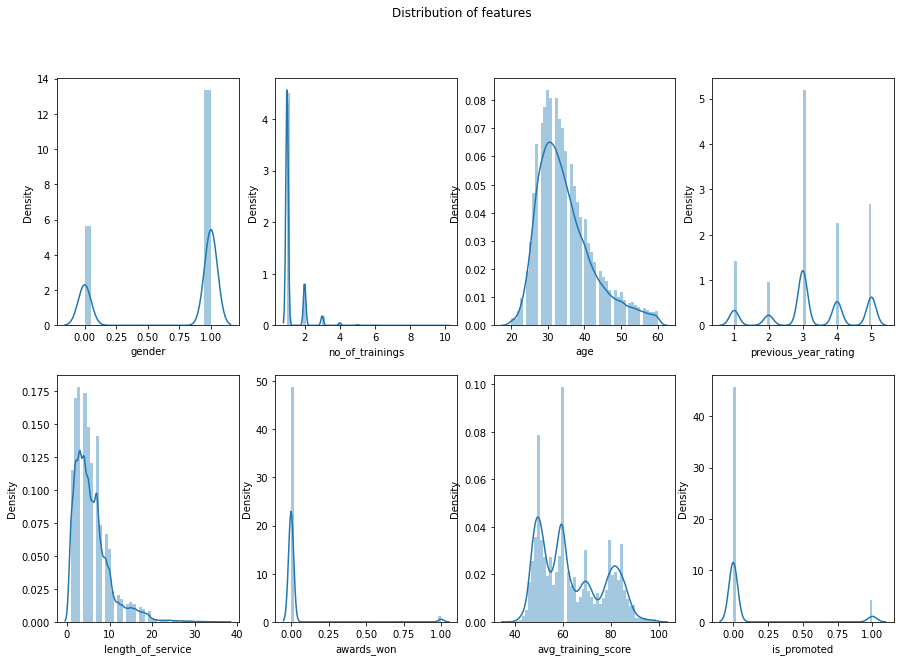

In [29]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15,10))

for i, feature in enumerate(df_cont):
  row = int(i/4)
  col = i%4
  sns.distplot(df_cont.iloc[:, i], ax=axs[row][col])

plt.suptitle('Distribution of features')
plt.tight_layout

**CATEGORICAL VARIABLE**

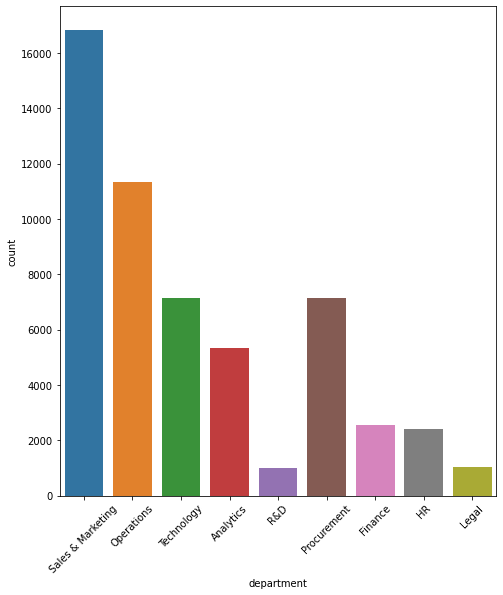

In [30]:
plt.figure(figsize=(36,9));
plt.subplot(1,4,1);
sns.countplot(x='department',data=df_cate);
plt.xticks(rotation=45);

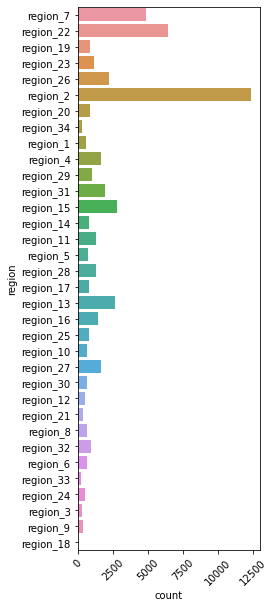

In [31]:
plt.figure(figsize=(15,10))
plt.subplot(1,4,2);
sns.countplot( y='region', data=df_cate);
plt.xticks(rotation=45);

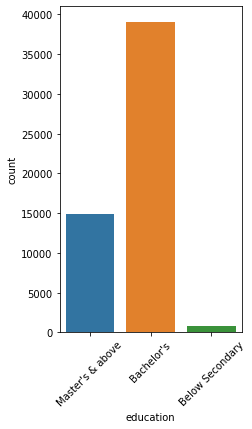

In [32]:
plt.figure(figsize=(15,6))
plt.subplot(1,4,3);
sns.countplot(x='education', data=df_cate);
plt.xticks(rotation=45);


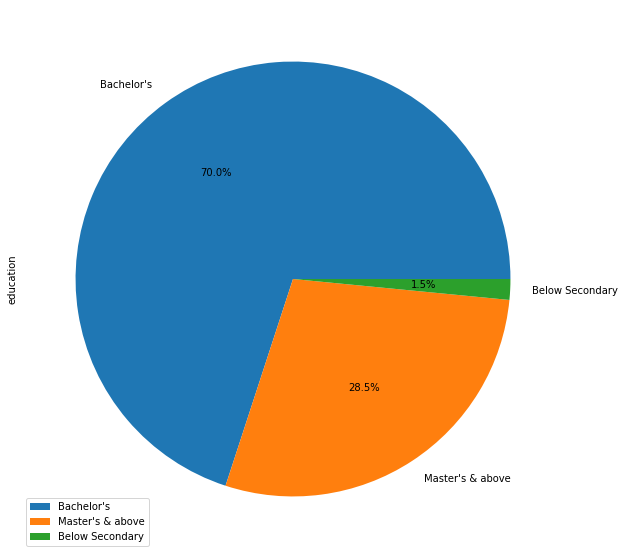

In [33]:
startup["education"].value_counts().head(7).plot(kind ='pie', autopct='%1.1f%%',figsize=(10,10),startangle=0).legend()

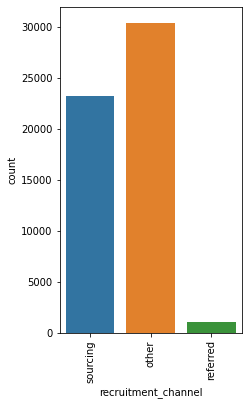

In [35]:
plt.figure(figsize=(15,6))
plt.subplot(1,4,4);
sns.countplot(x='recruitment_channel', data=df_cate)
plt.xticks(rotation=90);

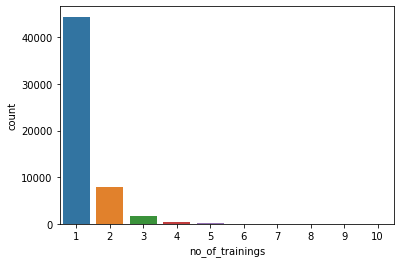

In [36]:
sns.countplot(data=startup,x="no_of_trainings")
plt.show()

Age distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text major ticklabel objects>)

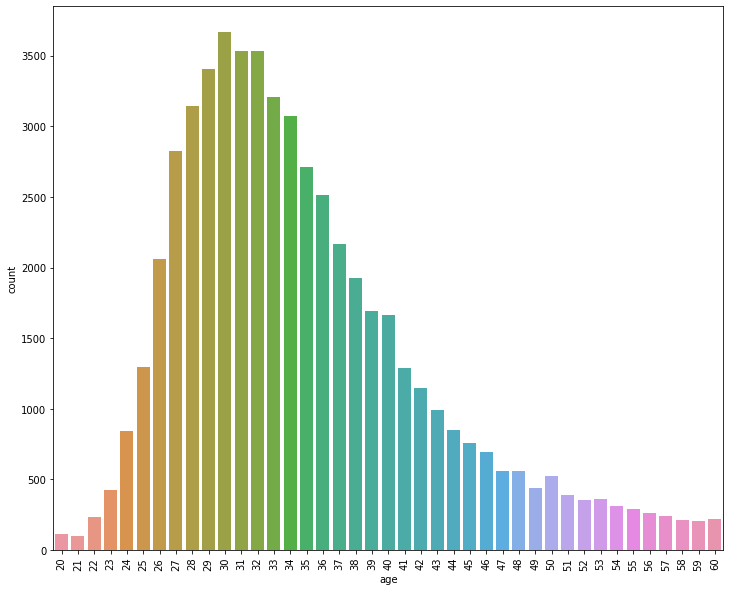

In [37]:
plt.figure(figsize=(12,10))
sns.countplot(startup.age)
plt.xticks(rotation=90)

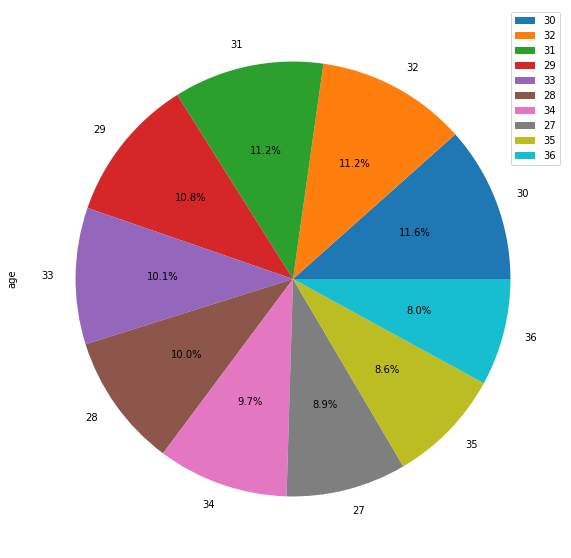

In [38]:
startup["age"].value_counts().head(10).plot(kind='pie',autopct='%1.1f%%',figsize=(10,10),startangle=0).legend()

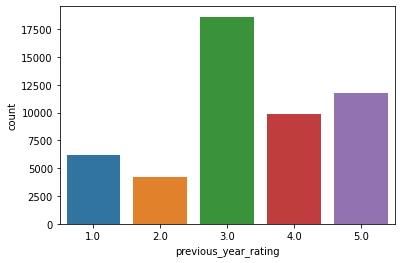

In [39]:
#previous year rating distribution
sns.countplot(data=startup, x= "previous_year_rating")
plt.show()

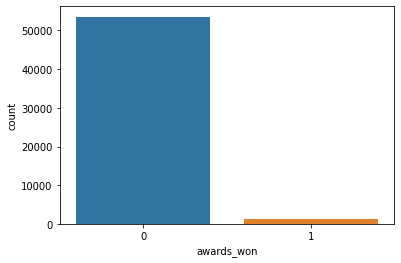

In [40]:
#Awards won distribution
sns.countplot(data=startup, x= "awards_won")
plt.show()

In [41]:
startup["is_promoted"].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

**BIVARIATE ANALYSIS**

In [42]:
df.sample()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
24400,Sales & Marketing,region_25,Master's & above,1,other,1,40,3.0,19,0,48.0,0


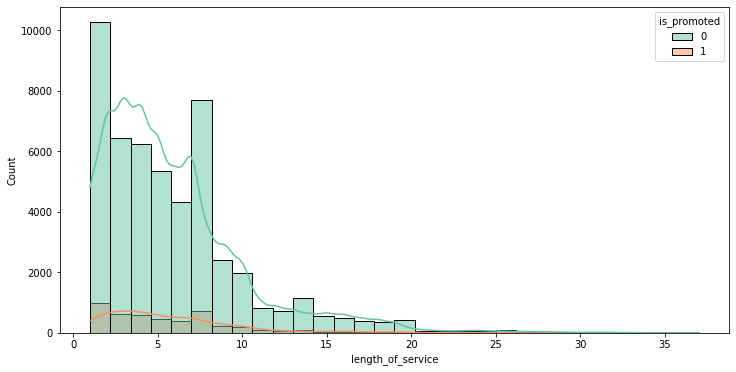

In [44]:
plt.figure(figsize=(12,6))
sns.histplot(x='length_of_service', hue='is_promoted',data=df,palette='Set2',bins=30,kde=True);

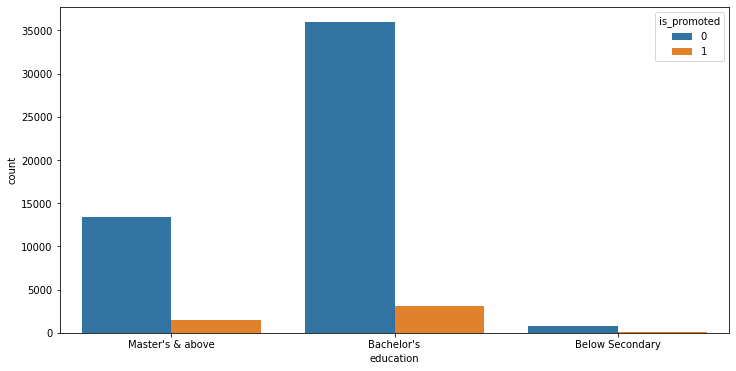

In [45]:
plt.figure(figsize=(12,6))
sns.countplot(x='education',hue='is_promoted',data=df)

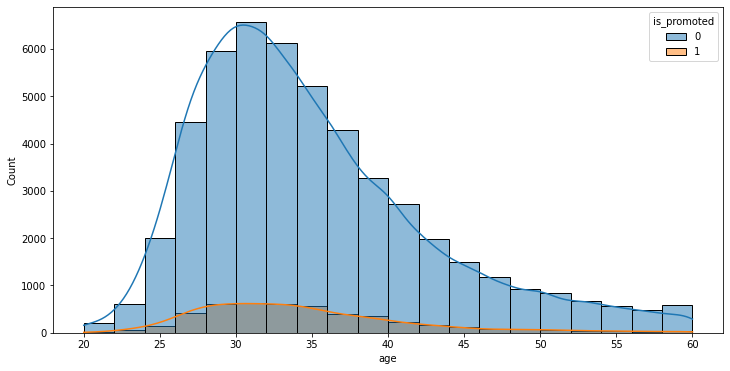

In [46]:
plt.figure(figsize=(12,6))
sns.histplot(x='age',hue='is_promoted',data=df,bins=20,kde=True)

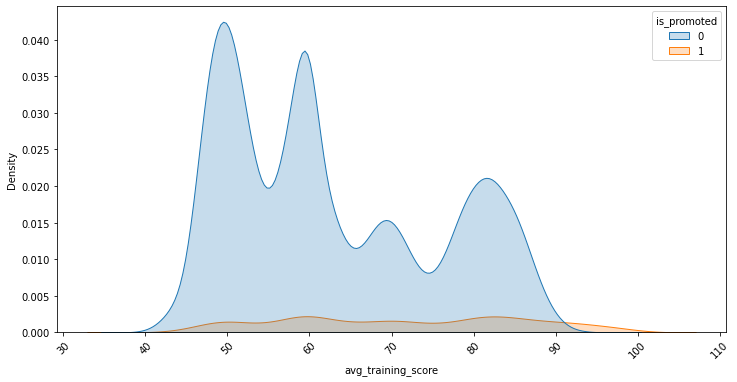

In [47]:
plt.figure(figsize=(12,6))
sns.kdeplot(x='avg_training_score',hue='is_promoted',data=df,shade=True)
plt.xticks(rotation=45);

**MULTIVARIATE ANALYSIS**

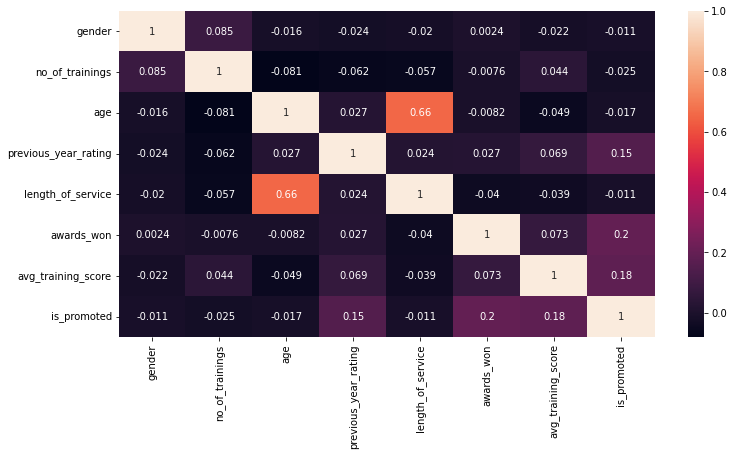

In [49]:
plt.figure(figsize=(12,6))
correlation = df_cont.corr(method='pearson')
sns.heatmap(correlation, annot=True);

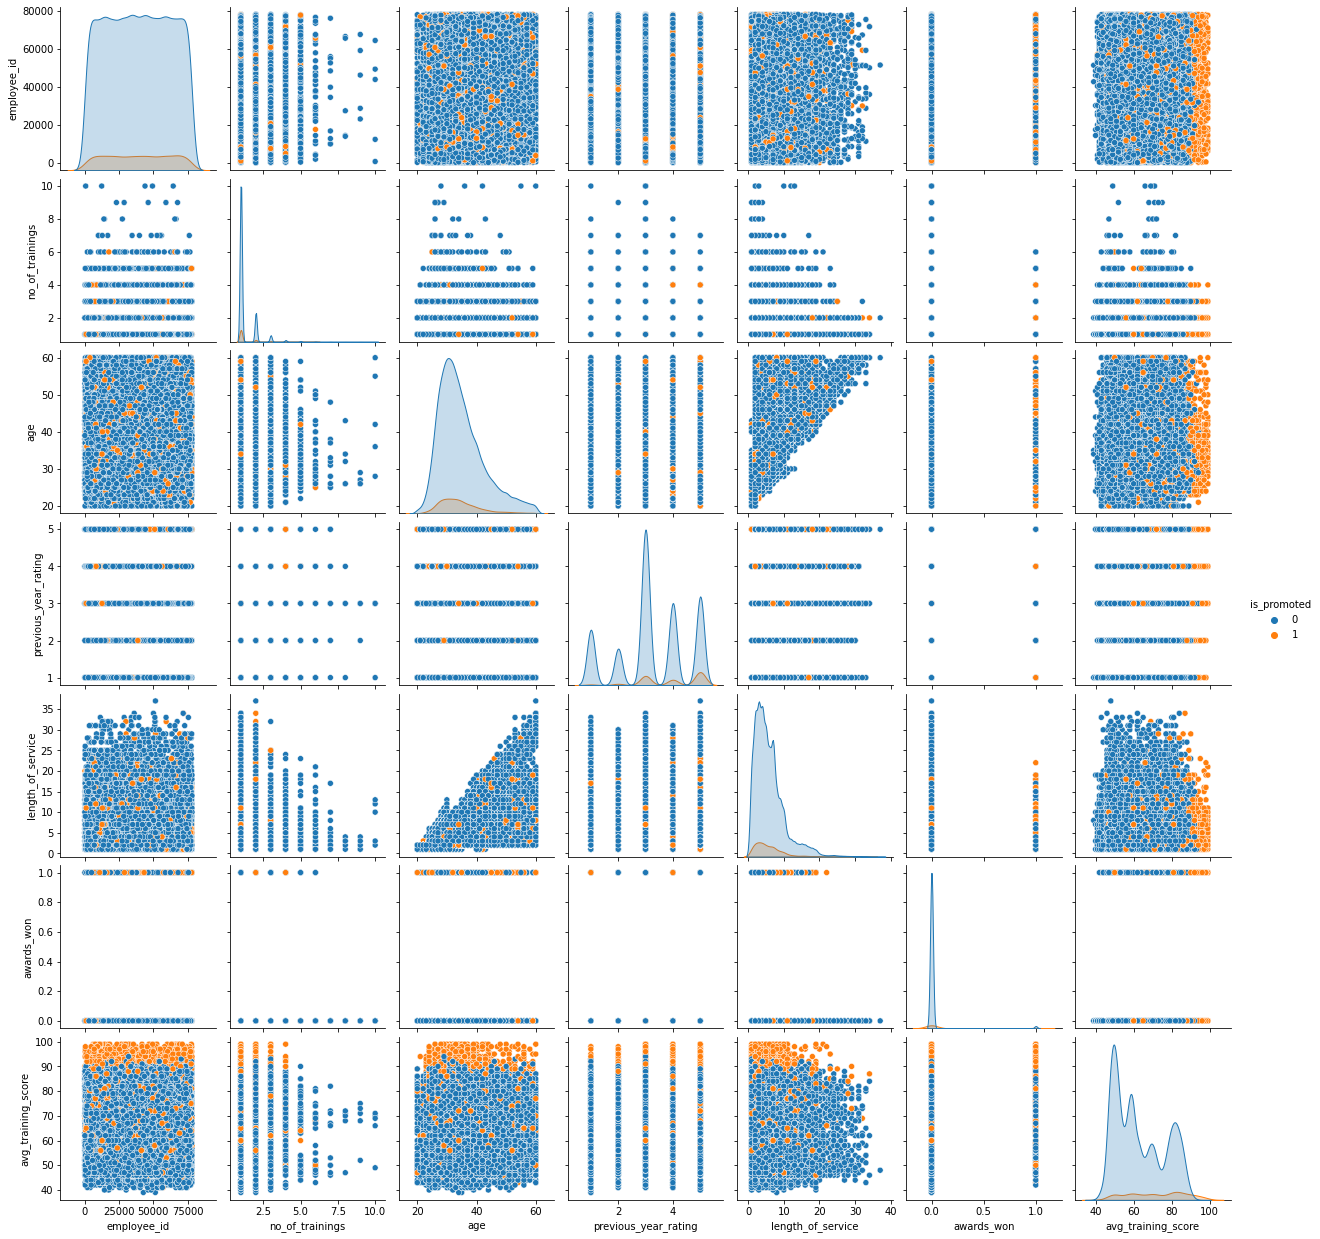

In [50]:
sns.pairplot(startup,diag_kind='kde',hue='is_promoted')

**Data Preparation**

In [51]:
dfcat = df_cate.copy()
dfnum = df_cont.drop('is_promoted', axis=1)

**One Hot Encoder**

In [52]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.1 MB/s 


In [53]:
import category_encoders as ce
OHE = ce.OneHotEncoder(cols= ['department','region', 'education', 'recruitment_channel'],use_cat_names=True)
dfcat = OHE.fit_transform(dfcat)

In [54]:
df_all = pd.concat([dfnum,dfcat],axis= 1)

In [55]:
X = df_all.copy()
y = df['is_promoted']

**Data Scaling**

In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X,columns=df_all.columns)

**Making Train and Test Data**

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

**Logistic Regression**

In [58]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [60]:
y_pred = log_reg.predict(X_test)

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
print("Confusion matrix: ", confusion_matrix(y_test,y_pred))
print("\nAccuracy score: ", accuracy_score(y_test,y_pred))
print("\nRecall  score: ", recall_score(y_test,y_pred))
print("\nPrecision score: ", precision_score(y_test,y_pred))

Confusion matrix:  [[15030    28]
 [ 1039   346]]

Accuracy score:  0.9351091649942225

Recall  score:  0.24981949458483754

Precision score:  0.9251336898395722


**Decision Tree**

In [63]:
from sklearn.tree import DecisionTreeRegressor

emp_model = DecisionTreeRegressor(random_state=1)
emp_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [64]:
y_pred = emp_model.predict(X_test)

In [65]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

0.11179022481704473

In [66]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,y_pred))

0.3339889961414013

In [67]:
#Calculating the score
print(emp_model.score(X_test, y_test))

-0.44613675496863414


**Random Forests**

In [68]:
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [69]:
y_pred = rf.predict(X_test)

In [70]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[14961,    97],
       [ 1011,   374]])

In [71]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("Recall  score: ", recall_score(y_test,y_pred))
print("Precision score: ", precision_score(y_test,y_pred))

Accuracy score:  0.9326157027306453
Recall  score:  0.2700361010830325
Precision score:  0.7940552016985138
